# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


Since we need to ensure that we catch as many claims as possible, we would prioritize recall as a metric.
Recall represents the proportion of how many cases we predicted as true out of the total number of true cases.
Here true case means a video where there was a claim.

The effect of predicting a false negative could be big as misclassifying a claim as an opinion could mislead the viewers.
On the other hand, the efefct of predicting a false positive is not as much because if we misclassify an opinion as a claim, we are just treating it with more scrutiny than we normally would have.
Better safe than sorry.

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np


# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics



# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna(axis = 0)


In [10]:
data = data.reset_index()
data.head()


,index,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
data.duplicated().sum()

0

Check for and handle outliers.

In [12]:
data = data.drop(["index"],axis = 1)

In [13]:
data.video_like_count.describe()

count     19084.000000
mean      84304.636030
std      133420.546814
min           0.000000
25%         810.750000
50%        3403.500000
75%      125020.000000
max      657830.000000
Name: video_like_count, dtype: float64

Check class balance.

In [14]:
data.claim_status.value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [15]:
def get_length(row):
    return len(row)

data["transcript_length"] = data["video_transcription_text"].apply(get_length)

Calculate the average text_length for claims and opinions.

In [16]:
data.transcript_length.mean()

89.09353385034584

In [17]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [18]:
data.groupby(["claim_status"]).transcript_length.mean()

claim_status
claim      95.376978
opinion    82.722562
Name: transcript_length, dtype: float64

Visualize the distribution of `text_length` for claims and opinions.

In [19]:
claims_data = data[data["claim_status"] == "claim"]
opinion_data = data[data["claim_status"] == "opinion"]

In [20]:
1 + 2

3

In [21]:
claims_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


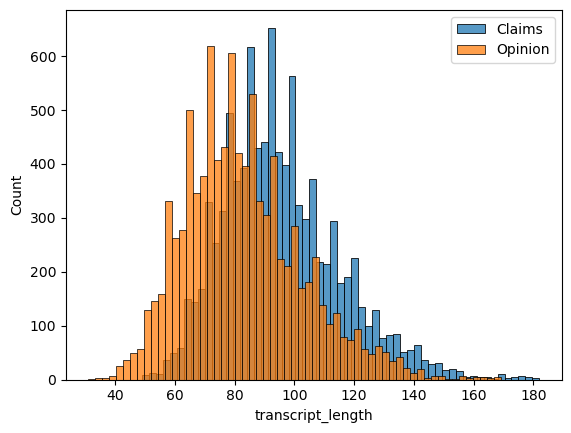

In [22]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

# fig,axes = plt.subplots(1,2,figsize = (10,4))


# sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
#              kde=False, palette="pastel", hue="claim_status",
#              element="bars", legend=True)

sns.histplot(claims_data["transcript_length"] , label='Claims',multiple="dodge")
# sns.histplot(claims_data['Feature1'], color='g', label='Feature1', kde=True)
sns.histplot(opinion_data["transcript_length"] , label = 'Opinion',multiple="dodge")

plt.legend()

**Feature selection and transformation**

Encode target and catgorical variables.

In [23]:
# Create a copy of the X data
X = data.copy()

# Drop unnecessary columns
X = X.drop(["#","video_id","claim_status","video_transcription_text"],axis = 1)

# Encode target variable
y = data["claim_status"].replace({'claim':1,'opinion':0})

# Dummy encode remaining categorical values
X = pd.get_dummies(X,["verified_status","author_ban_status"])


In [24]:
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,True,False,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,True,False,True,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,True,False,True,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,True,False,True,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,True,False,True,False,False


### **Task 4: Split the data**

Assign target variable.

In [25]:
y


0        1
1        1
2        1
3        1
4        1
        ..
19079    0
19080    0
19081    0
19082    0
19083    0
Name: claim_status, Length: 19084, dtype: int64

Isolate the features.

In [26]:
# Isolate features
X.head()


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,True,False,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,True,False,True,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,True,False,True,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,True,False,True,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,True,False,True,False,False


In [27]:
X.shape

(19084, 12)

#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [28]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [29]:
# Split the training data into training and validation sets
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size = 0.25,random_state = 0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [30]:
print("Train\t",X_tr.shape,y_tr.shape,"\n\nValidation",X_val.shape,y_val.shape)

Train	 (11450, 12) (11450,) 

Validation (3817, 12) (3817,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [31]:
# Instantiate the random forest classifier

from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()

# Create a dictionary of hyperparameters to tune
cv_param = {"max_depth" : [5,7,None],
            "min_samples_leaf" : [1,2],
            "min_samples_split" : [2,3],
            "max_features" : [0.3,0.6],
            "n_estimators" : [75,100,200]
           }


# Define a dictionary of scoring metrics to capture
scoring = {"accuracy","precision","recall","f1"}

# Instantiate the GridSearchCV re
clf = GridSearchCV(rf,cv_param,scoring = scoring, cv = 5 , refit = "recall")


In [32]:
%%time

clf.fit(X_train,y_train)

CPU times: user 9min 2s, sys: 1.28 s, total: 9min 3s
Wall time: 9min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [55]:
# Examine best recall score
clf.best_score_


0.9905432019583678

In [58]:
cv_results = pd.DataFrame(clf.cv_results_)
best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

results = pd.DataFrame([["Random Forest",f1,recall,precision,accuracy]],
                       columns = ["Model name","F1 score","Recall","Precision","Accuracy"])

In [59]:
# results timea
results

,Model name,F1 score,Recall,Precision,Accuracy
0,Random Forest,0.995248,0.990543,1.0,0.995219


In [35]:
# Examine best parameters
clf.best_params_


{'max_depth': 5,
 'max_features': 0.6,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 75}

**Question:** How well is your model performing? Consider average recall score and precision score.

Remarkably well with a recall score of 99.08%

### **Build an XGBoost model**

In [53]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state = 0)


# Create a dictionary of hyperparameters to tune
cv_param_xgb = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# Instantiate the GridSearchCV object
xgb_clf = GridSearchCV(xgb,cv_param_xgb,scoring = scoring,cv = 5, refit = "recall")


In [54]:
xgb_clf.fit(X_train,y_train)

KeyboardInterrupt: 

In [37]:
  # Get all the results from the CV and put them in a df
results = pd.DataFrame(xgb_clf.cv_results_)


**Question:** How well does your model perform? Consider recall score and precision score.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [72]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = clf.predict(X_val)

Display the predictions on the encoded testing set.

In [73]:
# Display the predictions on the encoded testing set
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [74]:
y_pred.shape

(3817,)

Display the true labels of the testing set.

In [75]:
# Display the true labels of the testing set
y_test

3695     1
11495    0
7604     1
12728    0
875      1
        ..
5488     1
10842    0
16253    0
1933     1
15475    0
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

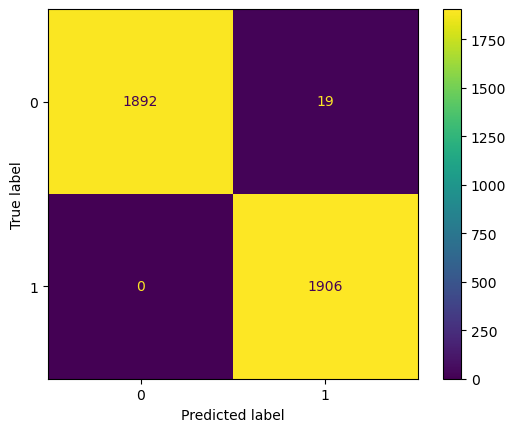

In [78]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_pred,y_val)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [79]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(metrics.classification_report(y_val, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

They are near perfect. So this is a great model.

#### **XGBoost**

In [43]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val_final)


In [44]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()



In [45]:
# Create a classification report
print(metrics.classification_report(y_val, y_pred, target_names=target_labels))


**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The random forest has better recall which is more important to us at this problem statement. So we choose that model

### **Use champion model to predict on test data**

In [84]:
### YOUR CODE HERE ###
y_pred_final = clf.best_estimator_.predict(X_test)

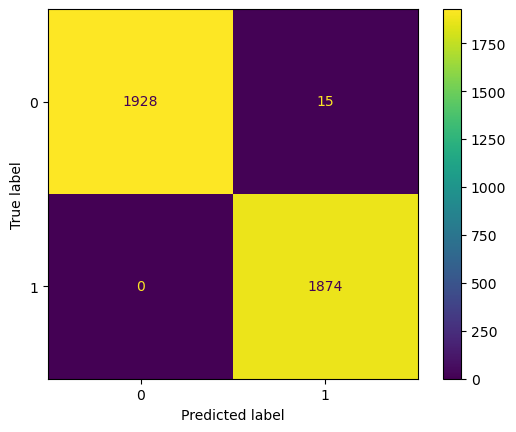

In [85]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_pred_final,y_test)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(cm)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()


#### **Feature importances of champion model**


<Axes: >

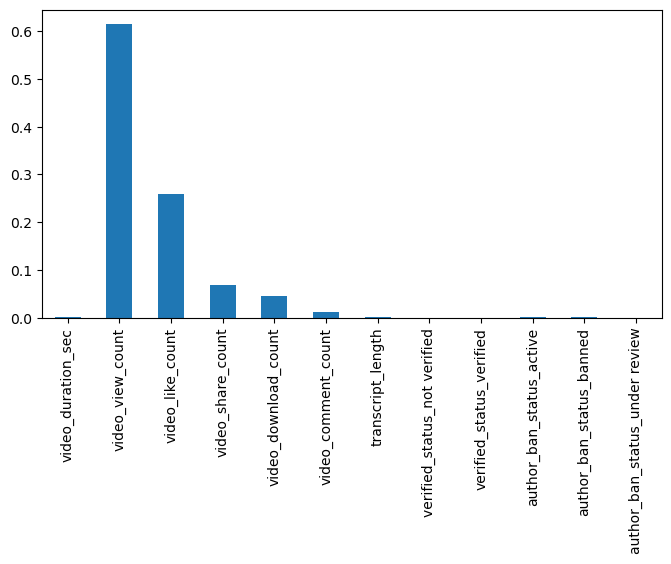

In [96]:
### YOUR CODE HERE ###
importances = clf.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
plt.figure(figsize=(8,4))

rf_importances.plot.bar()

**Question:** Describe your most predictive features. Were your results surprising?

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


Yes, would recommend using the random forest model as it provides for a much better recall score than other models.
As we are prioiritizing detecting all kinds of claims, recall becomes the main metric we are after.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.